# Gradient Descent

### Implementing `Batch` vs `Mini-batch` vs `Stochastic` Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions for Perceptron with 3 types of Gradient Descent

In [2]:
# linear regression using gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, weights, bias):
    return np.dot(X, weights) + bias
  
# function to compute gradient of error function w.r.t. weights
def gradient(X, y, weights, bias, learning_rate):
    h = hypothesis(X, weights, bias)
    grad_w = learning_rate * np.dot(X.transpose(), (h - y))
    grad_b = learning_rate * np.sum(h - y)
    return grad_w, grad_b

# function to compute the error for current values of weights
def cost(X, y, weights, bias):
    h = hypothesis(X, weights, bias)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

def iterate_minibatches(X, y, batch_size, shuffle=False):
    assert X.shape[0] == y.shape[0]
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, X.shape[0], batch_size):
        end_idx = min(start_idx + batch_size, X.shape[0])
        if shuffle:
            excerpt = indices[start_idx:end_idx]
        else:
            excerpt = slice(start_idx, end_idx)
        yield X[excerpt], y[excerpt]

# function to perform batch gradient descent
def batch_gradient_descent(X, y, learning_rate = 0.001, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    for _ in range(epochs):
        grad_w, grad_b = gradient(X, y, weights, bias, learning_rate)
        weights = weights - grad_w
        bias = bias - grad_b
        J = cost(X, y, weights, bias)
        print("Epoch: {}, Cost: {}".format(_, J))
        error_list.append(J)
  
    return weights, bias, error_list

# function to perform stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate = 0.001, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    for _ in range(epochs):
        for i in range(X.shape[0]):
            grad_w, grad_b = gradient(X[i:i+1, :], y[i:i+1], weights, bias, learning_rate)
            weights = weights - grad_w
            bias = bias - grad_b
            J = cost(X[i:i+1, :], y[i:i+1], weights, bias)
            error_list.append(J)
        print("Epoch: {}, Cost: {}".format(_, J))
  
    return weights, error_list

# function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size = 2, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    for _ in range(epochs):
        mini_batches = iterate_minibatches(X, y, batch_size, shuffle=True)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            grad_w, grad_b = gradient(X_mini, y_mini, weights, bias, learning_rate)
            weights = weights - grad_w
            bias = bias - grad_b
            J = cost(X_mini, y_mini, weights, bias)
        error_list.append(J)
        print("Epoch: {}, Cost: {}".format(_, J))
  
    return weights, bias, error_list

### Defining the Data

In [3]:
X = np.array([[0, 0, 1], 
              [0, 1, 1], 
              [1, 0, 1], 
              [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

In [4]:
print(X.shape)
X

(4, 3)


array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [5]:
print(y.shape)
y

(4, 1)


array([[0],
       [1],
       [1],
       [0]])

### Batch Gradient Descent

In [20]:
weights, bias, error_list = batch_gradient_descent(X, y, learning_rate = 0.001)

Epoch: 0, Cost: [0.990051]
Epoch: 1, Cost: [0.98030392]
Epoch: 2, Cost: [0.97075466]
Epoch: 3, Cost: [0.96139919]
Epoch: 4, Cost: [0.95223358]
Epoch: 5, Cost: [0.94325397]
Epoch: 6, Cost: [0.93445658]
Epoch: 7, Cost: [0.92583769]
Epoch: 8, Cost: [0.9173937]
Epoch: 9, Cost: [0.90912103]


Bias =  0.019124047680166293
Weights = 
 [[0.00951832]
 [0.00951832]
 [0.01912405]]


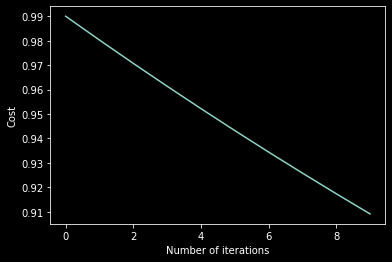

In [21]:
print("Bias = ", bias)
print("Weights = \n", weights)
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

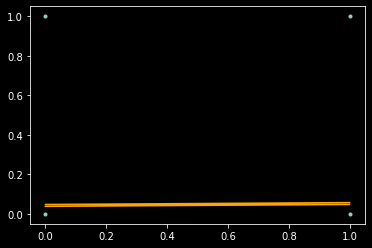

Mean absolute error =  0.5


In [8]:
y_pred = hypothesis(X, weights, bias)
plt.scatter(X[:, 1], y[:, ], marker = '.')
plt.plot(X[:, 1], y_pred, color = 'orange')
plt.show()
  
# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

### Stochastic Gradient Descent

In [9]:
theta, error_list = stochastic_gradient_descent(X, y, learning_rate = 0.01)

Epoch: 0, Cost: [0.00162587]
Epoch: 1, Cost: [0.00587011]
Epoch: 2, Cost: [0.01194244]
Epoch: 3, Cost: [0.01923074]
Epoch: 4, Cost: [0.02726466]
Epoch: 5, Cost: [0.03568633]
Epoch: 6, Cost: [0.04422684]
Epoch: 7, Cost: [0.05268738]
Epoch: 8, Cost: [0.0609241]
Epoch: 9, Cost: [0.06883606]


Bias =  0.019124047680166293
Weights = 
 [[0.00951832]
 [0.00951832]
 [0.01912405]]


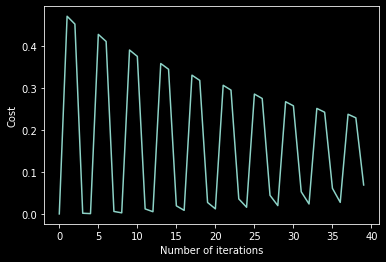

In [10]:
print("Bias = ", bias)
print("Weights = \n", weights)
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

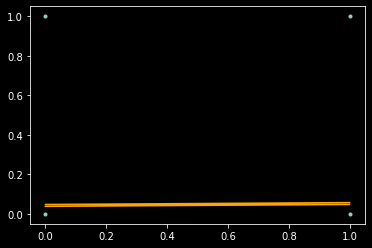

Mean absolute error =  0.5


In [11]:
y_pred = hypothesis(X, weights, bias)
plt.scatter(X[:, 1], y[:, ], marker = '.')
plt.plot(X[:, 1], y_pred, color = 'orange')
plt.show()
  
# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

### Mini-Batch Gradient Descent 

In [17]:
weights, bias, error_list = mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size=2)

Epoch: 0, Cost: [0.49503042]
Epoch: 1, Cost: [0.98021837]
Epoch: 2, Cost: [0.48535224]
Epoch: 3, Cost: [0.48064619]
Epoch: 4, Cost: [0.47603169]
Epoch: 5, Cost: [0.00088579]
Epoch: 6, Cost: [0.46752709]
Epoch: 7, Cost: [0.92442373]
Epoch: 8, Cost: [0.4591412]
Epoch: 9, Cost: [0.45419144]


Bias =  0.01908764667942487
Weights = 
 [[0.00949833]
 [0.00950401]
 [0.01908765]]


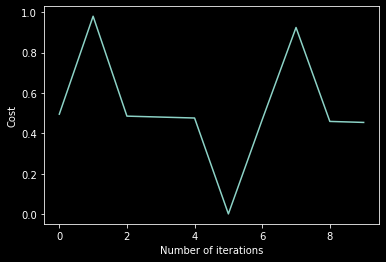

In [18]:
print("Bias = ", bias)
print("Weights = \n", weights)
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

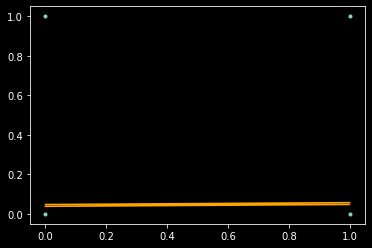

Mean absolute error =  0.5


In [19]:
y_pred = hypothesis(X, weights, bias)
plt.scatter(X[:, 1], y[:, ], marker = '.')
plt.plot(X[:, 1], y_pred, color = 'orange')
plt.show()
  
# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)